<a href="https://www.kaggle.com/code/danishquresh/student-dataset?scriptVersionId=288251016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Setting environment and loading dataset

In [1]:
# Warning: This will remove all variables except built-ins
for name in dir():
    if not name.startswith('_'):
        del globals()[name]


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Checking the path of the file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        print(path)

/kaggle/input/student-psychological-well-being-survey-data/Student Mental health.csv


In [3]:
df = pd.read_csv(path)

## Data Cleaning and Pre-processing

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [6]:
df[df.select_dtypes(include=['object', 'category']).columns] = \
    df.select_dtypes(include=['object', 'category']).apply(lambda col: col.str.strip().str.lower())


In [7]:
df['What is your course?'].unique()


array(['engineering', 'islamic education', 'bit', 'laws', 'mathemathics',
       'pendidikan islam', 'bcs', 'human resources', 'irkhs',
       'psychology', 'kenms', 'accounting', 'enm', 'marine science',
       'koe', 'banking studies', 'business administration', 'law',
       'kirkhs', 'usuluddin', 'taasl', 'engine', 'ala',
       'biomedical science', 'benl', 'it', 'cts', 'engin', 'econs',
       'mhsc', 'malcom', 'kop', 'human sciences', 'biotechnology',
       'communication', 'diploma nursing', 'radiography', 'fiqh fatwa',
       'diploma tesl', 'fiqh', 'nursing'], dtype=object)

#### `Age` column is in float 64, we will convert it to int. It also has 1 NaN value, we will fill it with median.

In [8]:
df["Age"] = df["Age"].fillna(df["Age"].median()).astype(int)


In [9]:
df["Age"]


0      18
1      21
2      19
3      22
4      23
       ..
96     21
97     18
98     19
99     23
100    20
Name: Age, Length: 101, dtype: int64

In [10]:
# Converting from object to category dtype
categorical_cols = [
    'Choose your gender', 'What is your course?', 'Your current year of Study',
    'Marital status', 'Do you have Depression?', 'Do you have Anxiety?',
    'Do you have Panic attack?', 'Did you seek any specialist for a treatment?',
    'What is your CGPA?'
]

df[categorical_cols] = df[categorical_cols].apply(lambda x: x.astype('category'))


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   Timestamp                                     101 non-null    object  
 1   Choose your gender                            101 non-null    category
 2   Age                                           101 non-null    int64   
 3   What is your course?                          101 non-null    category
 4   Your current year of Study                    101 non-null    category
 5   What is your CGPA?                            101 non-null    category
 6   Marital status                                101 non-null    category
 7   Do you have Depression?                       101 non-null    category
 8   Do you have Anxiety?                          101 non-null    category
 9   Do you have Panic attack?                     101 non-

In [12]:
# Checking the levels of the categories
for col in df.select_dtypes(['category']):
    print(f"{col}: {df[col].cat.categories.tolist()}")


Choose your gender: ['female', 'male']
What is your course?: ['accounting', 'ala', 'banking studies', 'bcs', 'benl', 'biomedical science', 'biotechnology', 'bit', 'business administration', 'communication', 'cts', 'diploma nursing', 'diploma tesl', 'econs', 'engin', 'engine', 'engineering', 'enm', 'fiqh', 'fiqh fatwa', 'human resources', 'human sciences', 'irkhs', 'islamic education', 'it', 'kenms', 'kirkhs', 'koe', 'kop', 'law', 'laws', 'malcom', 'marine science', 'mathemathics', 'mhsc', 'nursing', 'pendidikan islam', 'psychology', 'radiography', 'taasl', 'usuluddin']
Your current year of Study: ['year 1', 'year 2', 'year 3', 'year 4']
What is your CGPA?: ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']
Marital status: ['no', 'yes']
Do you have Depression?: ['no', 'yes']
Do you have Anxiety?: ['no', 'yes']
Do you have Panic attack?: ['no', 'yes']
Did you seek any specialist for a treatment?: ['no', 'yes']


In [13]:
df['What is your course?'].value_counts().reindex(df['What is your course?'].cat.categories, fill_value=0)


accounting                  1
ala                         1
banking studies             1
bcs                        18
benl                        3
biomedical science          4
biotechnology               1
bit                        10
business administration     1
communication               1
cts                         1
diploma nursing             1
diploma tesl                1
econs                       1
engin                       1
engine                      2
engineering                17
enm                         1
fiqh                        1
fiqh fatwa                  1
human resources             1
human sciences              1
irkhs                       1
islamic education           2
it                          1
kenms                       1
kirkhs                      2
koe                         6
kop                         1
law                         1
laws                        2
malcom                      1
marine science              1
mathemathi

In [14]:
# Define a mapping from old course names to new merged categories
course_mapping = {
    'engineering': 'Engineering/IT', 'engin': 'Engineering/IT', 'engine': 'Engineering/IT',
    'bit': 'Engineering/IT', 'cts': 'Engineering/IT', 'it': 'Engineering/IT',
    'marine science': 'Engineering/IT', 'mathemathics': 'Engineering/IT', 'mhsc': 'Engineering/IT',
    
    'business administration': 'Business/Management', 'bcs': 'Business/Management',
    'human resources': 'Business/Management', 'econs': 'Business/Management',
    'accounting': 'Business/Management',
    
    'law': 'Law/Islamic Studies', 'laws': 'Law/Islamic Studies',
    'fiqh': 'Law/Islamic Studies', 'fiqh fatwa': 'Law/Islamic Studies',
    'islamic education': 'Law/Islamic Studies', 'usuluddin': 'Law/Islamic Studies',
    
    'nursing': 'Health/Medical', 'diploma nursing': 'Health/Medical',
    'biomedical science': 'Health/Medical', 'radiography': 'Health/Medical',
    'biotechnology': 'Health/Medical',
    
    'communication': 'Social/Arts/Education', 'ala': 'Social/Arts/Education',
    'taasl': 'Social/Arts/Education', 'pendidikan islam': 'Social/Arts/Education',
    'psychology': 'Social/Arts/Education', 'human sciences': 'Social/Arts/Education',
    
    'benl': 'Other', 'kenms': 'Other', 'kirkhs': 'Other',
    'koe': 'Other', 'kop': 'Other', 'malcom': 'Other', 'diploma tesl': 'Other'
}

# Apply mapping
df['What is your course?'] = df['What is your course?'].map(course_mapping)

# Check counts again
df['What is your course?'].value_counts()


What is your course?
Engineering/IT           35
Business/Management      22
Other                    15
Social/Arts/Education    10
Law/Islamic Studies       8
Health/Medical            8
Name: count, dtype: int64

In [15]:
df['What is your course?'] = df['What is your course?'].astype('category')

#### Ordering the categorical varibales where order matters

In [16]:
# Defining the correct order of the categories
year_order = ['year 1', 'year 2', 'year 3', 'year 4']
cgpa_order = ['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00']


# Converting to ordered categoricals
df['Your current year of Study'] = pd.Categorical(df['Your current year of Study'],
                                                  categories=year_order,
                                                  ordered=True)

df['What is your CGPA?'] = pd.Categorical(df['What is your CGPA?'],
                                          categories=cgpa_order,
                                          ordered=True)


In [17]:
# Checking

print(df['Your current year of Study'].cat.categories)
print(df['Your current year of Study'].cat.ordered)

print(df['What is your CGPA?'].cat.categories)
print(df['What is your CGPA?'].cat.ordered)

Index(['year 1', 'year 2', 'year 3', 'year 4'], dtype='object')
True
Index(['0 - 1.99', '2.00 - 2.49', '2.50 - 2.99', '3.00 - 3.49', '3.50 - 4.00'], dtype='object')
True


## Exploratory Data Analysis

In [18]:
for col in df.select_dtypes('category'):
    print(df[col].value_counts(), "\n")

Choose your gender
female    75
male      26
Name: count, dtype: int64 

What is your course?
Engineering/IT           35
Business/Management      22
Other                    15
Social/Arts/Education    10
Law/Islamic Studies       8
Health/Medical            8
Name: count, dtype: int64 

Your current year of Study
year 1    43
year 2    26
year 3    24
year 4     8
Name: count, dtype: int64 

What is your CGPA?
3.50 - 4.00    48
3.00 - 3.49    43
0 - 1.99        4
2.50 - 2.99     4
2.00 - 2.49     2
Name: count, dtype: int64 

Marital status
no     85
yes    16
Name: count, dtype: int64 

Do you have Depression?
no     66
yes    35
Name: count, dtype: int64 

Do you have Anxiety?
no     67
yes    34
Name: count, dtype: int64 

Do you have Panic attack?
no     68
yes    33
Name: count, dtype: int64 

Did you seek any specialist for a treatment?
no     95
yes     6
Name: count, dtype: int64 



/tmp/ipykernel_25/3098180358.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].cat.categories, ax=axes[i], palette="Set2")
/tmp/ipykernel_25/3098180358.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].cat.categories, ax=axes[i], palette="Set2")
/tmp/ipykernel_25/3098180358.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].cat.categories, ax=axes[i], palette="Set2")
/tmp/ipykernel_25/3098180358.py:25: FutureWarning: 

Passing `palette` wi

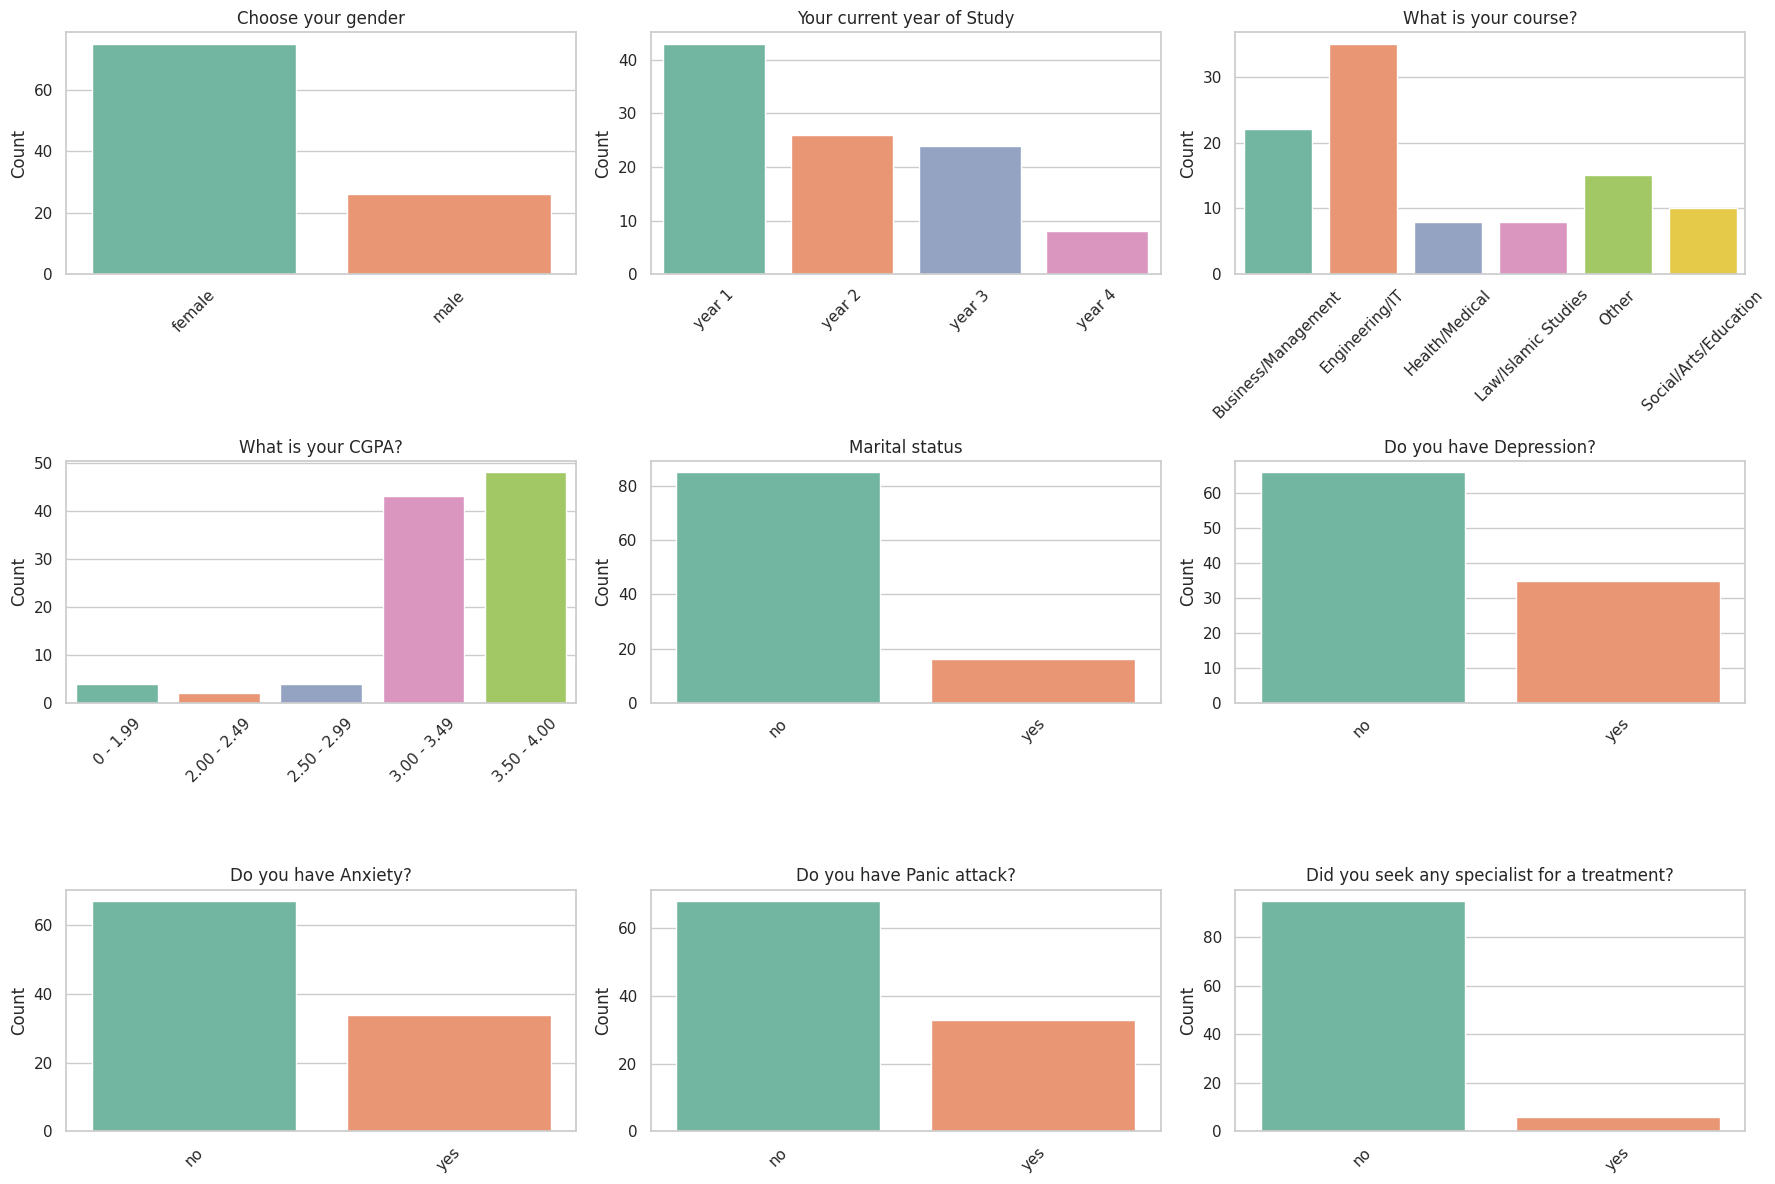

In [19]:
# Set style
sns.set(style="whitegrid")

# List of categorical columns
cat_cols = [
    'Choose your gender',
    'Your current year of Study',
    'What is your course?',
    'What is your CGPA?',
    'Marital status',
    'Do you have Depression?',
    'Do you have Anxiety?',
    'Do you have Panic attack?',
    'Did you seek any specialist for a treatment?'
]

# Determine number of subplots
n_cols = 3
n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # ceil division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, order=df[col].cat.categories, ax=axes[i], palette="Set2")
    axes[i].set_title(col)
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


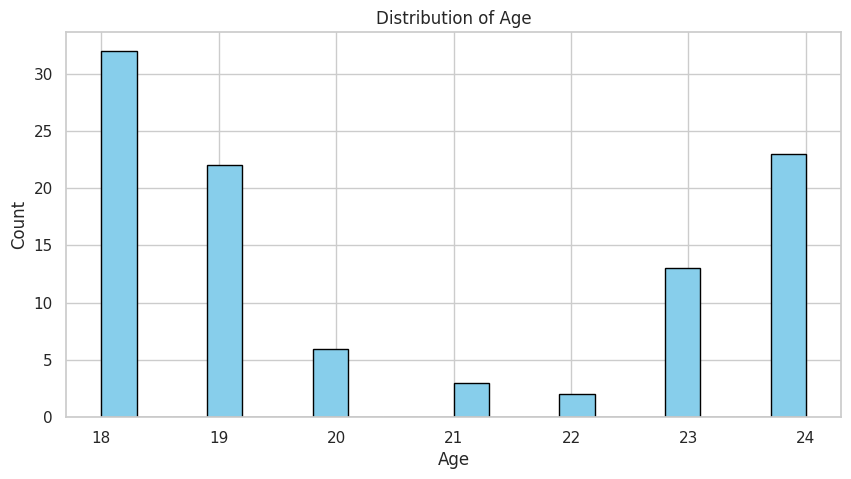

In [20]:
plt.figure(figsize=(10,5))

plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')  # histogram
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")

plt.show()

In [21]:
df['Age'].describe()

count    101.000000
mean      20.514851
std        2.488429
min       18.000000
25%       18.000000
50%       19.000000
75%       23.000000
max       24.000000
Name: Age, dtype: float64

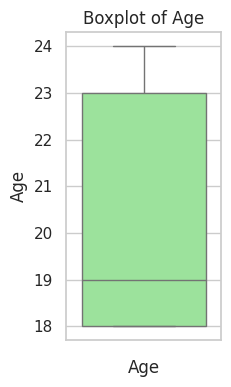

In [22]:
plt.figure(figsize=(2,4))
sns.boxplot(y=df['Age'], color='lightgreen')
plt.title("Boxplot of Age")
plt.xlabel("Age")
plt.show()

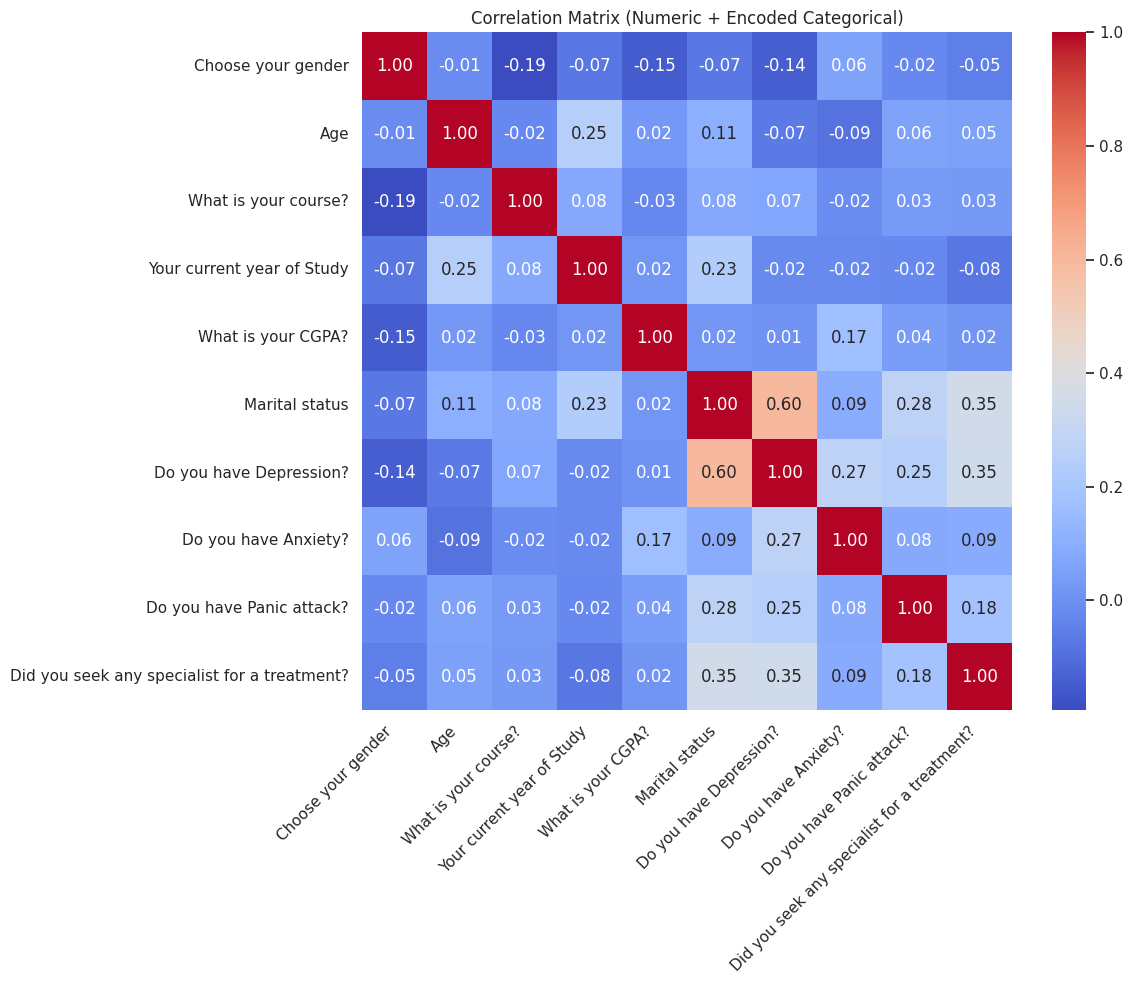

In [23]:


# Copy the dataframe
df_encoded = df.copy()

# Encode all categorical columns as numbers
for col in df_encoded.select_dtypes('category'):
    df_encoded[col] = df_encoded[col].cat.codes

# Now select all columns that are numeric (including encoded categoricals)
numeric_cols = df_encoded.columns[df_encoded.dtypes.apply(lambda x: np.issubdtype(x, np.number))]

# Compute correlation matrix
corr = df_encoded[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix (Numeric + Encoded Categorical)")


# Rotate x-axis labels 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right' aligns labels nicely
plt.yticks(rotation=0)  # optional: keep y-axis labels horizontal

plt.title("Correlation Matrix (Numeric + Encoded Categorical)")
plt.tight_layout()  # ensures nothing gets cut off
plt.show()

## Training & Testing Models

In [24]:
# --- 1. Prepare the data ---
df_model = df.copy()

# Encode all categorical variables
for col in df_model.select_dtypes('category'):
    df_model[col] = df_model[col].cat.codes

# Define target and features
target = 'Do you have Depression?'
X = df_model.drop(columns=[target, 'Timestamp'])
y = df_model[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 2. Define models ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier()
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 3. Evaluate each model ---
for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Cross-validation on training set
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    print(f"CV Mean Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")
    
    # Train on full training set and evaluate on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



=== Logistic Regression ===
CV Mean Accuracy: 0.800 (+/- 0.061)
Test Set Accuracy: 0.8571428571428571
Confusion Matrix:
 [[14  0]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.57      0.73         7

    accuracy                           0.86        21
   macro avg       0.91      0.79      0.82        21
weighted avg       0.88      0.86      0.84        21


=== Decision Tree ===
CV Mean Accuracy: 0.762 (+/- 0.073)
Test Set Accuracy: 0.7142857142857143
Confusion Matrix:
 [[11  3]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        14
           1       0.57      0.57      0.57         7

    accuracy                           0.71        21
   macro avg       0.68      0.68      0.68        21
weighted avg       0.71      0.71      0.71        21


=== Random Forest ===

The above tests all the different classification models and gives us the best model. Now below we will work on only Logistic Regression as that is the one I am currently studying in my class.

## Logistic Regression

In [25]:
# Copy dataset
df_model = df.copy()

# Encode categorical variables
for col in df_model.select_dtypes('category'):
    df_model[col] = df_model[col].cat.codes

# Define target and features
target = 'Do you have Depression?'
X = df_model.drop(columns=[target, 'Timestamp'])
y = df_model[target]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [26]:
# Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict probabilities and classes
y_pred_prob = logreg.predict_proba(X_test)[:,1]  # probability of class 1
y_pred = logreg.predict(X_test)

In [27]:
print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.8571428571428571
Confusion Matrix:
 [[14  0]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90        14
           1       1.00      0.57      0.73         7

    accuracy                           0.86        21
   macro avg       0.91      0.79      0.82        21
weighted avg       0.88      0.86      0.84        21



- Overall, 85.7% of predictions are correct.

- Pretty good for a small dataset like yours.

- True Negatives (TN) = 14 → correctly predicted no depression

- False Positives (FP) = 0 → no "no" predicted as "yes"

- False Negatives (FN) = 3 → missed 3 actual depression cases

- True Positives (TP) = 4 → correctly predicted depression

##### Model is very good at predicting "no depression". Slightly worse at predicting "yes depression".

- Precision for 1 (yes) = 1.0 → all predicted depression cases were actually depression

- Recall for 1 (yes) = 0.57 → the model only detects 57% of actual depression cases → misses 43%

- F1-score = harmonic mean of precision and recall → balances false positives & false negatives

- Macro avg = unweighted average of the two classes

- Weighted avg = accounts for class imbalance

In [28]:
# Coefficients and odds ratios
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0],
    'Odds_Ratio': np.exp(logreg.coef_[0])
}).sort_values(by='Odds_Ratio', ascending=False)

print(coefficients)


                                        Feature  Coefficient  Odds_Ratio
5                                Marital status     2.459083   11.694078
6                          Do you have Anxiety?     1.063550    2.896636
8  Did you seek any specialist for a treatment?     1.030229    2.801706
7                     Do you have Panic attack?     0.511689    1.668106
2                          What is your course?    -0.004937    0.995075
1                                           Age    -0.114480    0.891830
4                            What is your CGPA?    -0.262226    0.769337
3                    Your current year of Study    -0.313619    0.730798
0                            Choose your gender    -0.746400    0.474070


**Logistic Regression Results and Interpretation**

**1. Test Set Performance**

- **Accuracy:** 0.857 (85.7% of predictions correct)

**Confusion Matrix**
| Actual \ Predicted | No (0) | Yes (1) |
|------------------|--------|---------|
| No (0)            | 14     | 0       |
| Yes (1)           | 3      | 4       |

**Interpretation:**
- True Negatives (TN) = 14 → correctly predicted no depression
- False Positives (FP) = 0 → predicted yes incorrectly
- False Negatives (FN) = 3 → missed 3 actual depression cases
- True Positives (TP) = 4 → correctly predicted depression
- The model predicts "no depression" very well but misses some "yes depression" cases.

**Classification Report:**
| Class | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0 (no) | 0.82      | 1.00   | 0.90     | 14      |
| 1 (yes)| 1.00      | 0.57   | 0.73     | 7       |
| **Accuracy** |  |  | 0.86     | 21      |
| **Macro avg** | 0.91 | 0.79 | 0.82 | 21 |
| **Weighted avg** | 0.88 | 0.86 | 0.84 | 21 |

**Interpretation:**
- Precision for class 1 (yes) = 1.0 → all predicted depression cases were correct
- Recall for class 1 = 0.57 → only detects 57% of actual depression cases
- F1-score balances precision and recall
- Accuracy is high, but recall for depression could be improved

---

**2. Logistic Regression Coefficients and Odds Ratios**

| Feature                                   | Coefficient | Odds Ratio | Interpretation |
|-------------------------------------------|------------|------------|----------------|
| Marital status                            | 2.459      | 11.70      | Being married increases the odds of depression ~11.7x compared to unmarried students. |
| Do you have Anxiety?                       | 1.064      | 2.90       | Having anxiety nearly triples the odds of depression. |
| Did you seek any specialist for treatment?| 1.030      | 2.80       | Students who sought treatment are more likely to have depression. |
| Do you have Panic attack?                  | 0.512      | 1.67       | Having a panic attack slightly increases the odds of depression. |
| What is your course?                       | -0.005     | 0.995      | Minimal effect on depression probability. |
| Age                                       | -0.114     | 0.892      | Each additional year of age slightly decreases the odds of depression. |
| What is your CGPA?                         | -0.262     | 0.769      | Higher CGPA slightly reduces the odds of depression. |
| Your current year of Study                 | -0.314     | 0.731      | Being in a higher year slightly reduces the odds of depression. |
| Choose your gender                          | -0.746     | 0.474      | Being male decreases the odds of depression compared to female students. |

**Key Points:**
- **Positive coefficients / Odds Ratio > 1**: Increase the likelihood of depression.
- **Negative coefficients / Odds Ratio < 1**: Decrease the likelihood of depression.
- **Strongest predictors**: Marital status, Anxiety, Seeking specialist, Panic attack.
- **Minimal effect**: Course.
- Coefficients represent **log-odds**, while odds ratios are easier to interpret.

---

**3. Summary of Observations**

1. Logistic Regression achieves **high overall accuracy (85.7%)**.  
2. The model is **very good at predicting "no depression"**, but **misses some actual depression cases**.  
3. **Key predictors of depression**:  
   - Marital status  
   - Anxiety  
   - Panic attack  
   - Seeking specialist treatment  
4. **Protective factors** (reduce odds of depression):  
   - Male gender  
   - Higher age  
   - Higher CGPA  
   - Higher year of study  
5. To improve detection of depression (class 1), consider:  
   - Using `class_weight='balanced'`  
   - Collecting more data for minority class  
   - Hyperparameter tuning or regularization


In [29]:
# Exclude Timestamp
X = df.drop(columns=[target, 'Timestamp'])
y = df[target]

# One-hot encode all categorical variables
X_ohe = pd.get_dummies(X, drop_first=True)

# Fit logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_ohe, y)

# Predicted probabilities
y_pred_prob = logreg.predict_proba(X_ohe)[:,1]

# Coefficients
coefs = logreg.coef_[0]

# Compute marginal effects / APE
marginal_effects = X_ohe.values * 0
for i, coef in enumerate(coefs):
    marginal_effects[:, i] = coef * y_pred_prob * (1 - y_pred_prob)

APE = pd.DataFrame({
    'Feature': X_ohe.columns,
    'APE': marginal_effects.mean(axis=0)
}).sort_values(by='APE', key=abs, ascending=False)

print(APE)


                                             Feature       APE
14                                Marital status_yes  0.394612
17  Did you seek any specialist for a treatment?_yes  0.179528
15                          Do you have Anxiety?_yes  0.157899
12                    What is your CGPA?_3.00 - 3.49  0.127097
1                            Choose your gender_male -0.119078
9                  Your current year of Study_year 4  -0.10004
16                     Do you have Panic attack?_yes  0.097053
3                What is your course?_Health/Medical -0.073346
13                    What is your CGPA?_3.50 - 4.00 -0.059875
11                    What is your CGPA?_2.50 - 2.99  0.046243
7                  Your current year of Study_year 2 -0.040013
10                    What is your CGPA?_2.00 - 2.49 -0.038555
8                  Your current year of Study_year 3 -0.029098
5                         What is your course?_Other -0.028942
6         What is your course?_Social/Arts/Education  0

**Logistic Regression – Average Partial Effects (APE)**

| Feature                                      | APE       | Interpretation |
|----------------------------------------------|-----------|----------------|
| Marital status_yes                            | 0.395     | Being married increases probability of depression |
| Did you seek any specialist for a treatment?_yes | 0.180 | Students who sought treatment are more likely to have depression |
| Do you have Anxiety?_yes                       | 0.158     | Having anxiety increases probability of depression |
| What is your CGPA?_3.00 - 3.49                | 0.127     | Moderate CGPA slightly increases probability of depression |
| Choose your gender_male                        | -0.119    | Being male decreases probability of depression |
| Your current year of Study_year 4             | -0.100    | Higher year slightly reduces probability of depression |
| Do you have Panic attack?_yes                 | 0.097     | Having a panic attack increases probability of depression |
| What is your course?_Health/Medical           | -0.073    | Health/Medical students slightly less likely to have depression |
| What is your CGPA?_3.50 - 4.00               | -0.060    | High CGPA slightly reduces probability of depression |
| What is your CGPA?_2.50 - 2.99               | 0.046     | Moderate-low CGPA slightly increases probability of depression |
| Your current year of Study_year 2             | -0.040    | Second year slightly reduces probability of depression |
| What is your CGPA?_2.00 - 2.49               | -0.039    | Low CGPA slightly reduces probability of depression |
| Your current year of Study_year 3             | -0.029    | Third year slightly reduces probability of depression |
| What is your course?_Other                     | -0.029    | Other courses slightly reduce probability of depression |
| What is your course?_Social/Arts/Education    | 0.028     | Social/Arts/Education slightly increases probability of depression |
| Age                                           | -0.015    | Each additional year slightly reduces probability of depression |
| What is your course?_Law/Islamic Studies     | 0.011     | Law/Islamic Studies has minimal effect |
| What is your course?_Engineering/IT          | 0.007     | Engineering/IT has minimal effect |


## Logistic Regression – APE Interpretation Summary

**1. Strongest Positive Predictors of Depression**
- **Marital status (married)**: Being married increases the probability of depression the most (~0.39).  
- **Seeking specialist treatment**: Students who sought treatment are more likely to be depressed (~0.18).  
- **Anxiety**: Having anxiety also raises the likelihood of depression (~0.16).  
- **Panic attack**: Slightly increases probability (~0.10).  

**2. Moderate Effects**
- **CGPA (3.00–3.49)**: Slightly increases probability (~0.13).  
- **Course type – Social/Arts/Education**: Slight increase (~0.03).  
- **Low to moderate CGPA (2.50–2.99)**: Small increase (~0.046).  

**3. Negative Predictors (Protective Factors)**
- **Gender (male)**: Being male reduces probability of depression (~-0.12).  
- **Higher year of study**: Year 2, 3, 4 slightly reduce probability (~-0.03 to -0.10).  
- **Higher CGPA (3.50–4.00)**: Slightly protective (~-0.06).  
- **Course types – Health/Medical, Other, Law/Islamic Studies, Engineering/IT**: Minimal negative impact (~-0.07 to 0.01).  
- **Age**: Each additional year slightly reduces probability (~-0.015).  

**4. Key Takeaways**
- Psychological factors (**Anxiety, Panic attack, seeking treatment**) are strong positive predictors.  
- Marital status is the **most influential non-psychological predictor**.  
- Academic performance and progression (CGPA, Year of study) are modestly protective.  
- Gender shows some protective effect (males less likely to be depressed in this sample).  
- Certain course categories have minimal influence on depression probability.  

✅ **Conclusion:** The APE analysis highlights which features have the greatest practical effect on depression probability. Interventions could focus on high-risk


## Efficient code for Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- 1. Prepare data ---
X = df.drop(columns=['Do you have Depression?', 'Timestamp'])  # Features
y = df['Do you have Depression?']  # Target

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# --- 2. Split into train/test (fixed test set) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 3. Define logistic regression ---
logreg = LogisticRegression(max_iter=1000)

# --- 4. Fit model on training set ---
logreg.fit(X_train, y_train)

# --- 5. Predict on test set ---
y_pred = logreg.predict(X_test)

# --- 6. Evaluate test set performance ---
print(f"Test Set Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --- 7. Cross-validation with 25% test size ---
cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
cv_scores = cross_val_score(logreg, X, y, cv=cv, scoring='accuracy')
print(f"Cross-validated Accuracy: {cv_scores.mean():.3f} (+/- {cv_scores.std():.3f})")


Test Set Accuracy: 0.810
Confusion Matrix:
 [[13  1]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

          no       0.81      0.93      0.87        14
         yes       0.80      0.57      0.67         7

    accuracy                           0.81        21
   macro avg       0.81      0.75      0.77        21
weighted avg       0.81      0.81      0.80        21

Cross-validated Accuracy: 0.769 (+/- 0.081)


## Test Set Evaluation

Accuracy: 0.810 → About 81% of the predictions are correct on the hold-out set.

**Confusion Matrix:**
| Actual \ Predicted | No | Yes |
| ------------------ | -- | --- |
| No                 | 13 | 1   |
| Yes                | 3  | 4   |

**Interpretation:**

TN = 13 → correctly predicted “no depression”

FP = 1 → misclassified 1 “no” as “yes”

FN = 3 → missed 3 “yes” cases

TP = 4 → correctly predicted “yes”

**Classification Report:**

Precision for “yes”: 0.80 → 80% of predicted depression cases are correct

Recall for “yes”: 0.57 → model detects 57% of actual depression cases

F1-score balances precision & recall

**Cross-validated Accuracy:**

Mean: 0.769 → ~77% average accuracy over 5 folds with 25% test size each

Std: 0.081 → some variability due to small sample size

**Takeaways:**

Logistic regression is performing decently with this small dataset.

Test set accuracy is slightly higher than CV mean, which is expected with small samples.

The model predicts “no depression” better than “yes depression”.

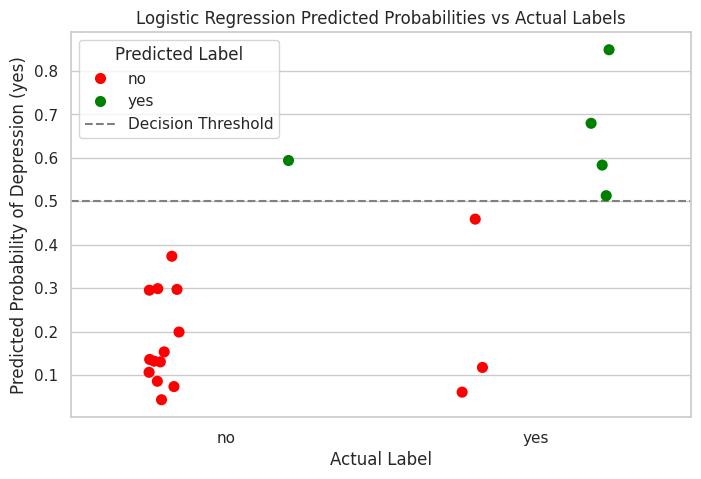

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for class "yes" (1)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Combine into a DataFrame for plotting
df_plot = X_test.copy()
df_plot['Actual'] = y_test.values
df_plot['Predicted_Prob'] = y_prob
df_plot['Predicted_Label'] = y_pred

plt.figure(figsize=(8,5))
sns.stripplot(x='Actual', y='Predicted_Prob', data=df_plot, 
              hue='Predicted_Label', dodge=True, palette=['red','green'], size=8)
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Threshold')
plt.title("Logistic Regression Predicted Probabilities vs Actual Labels")
plt.ylabel("Predicted Probability of Depression (yes)")
plt.xlabel("Actual Label")
plt.legend(title="Predicted Label")
plt.show()


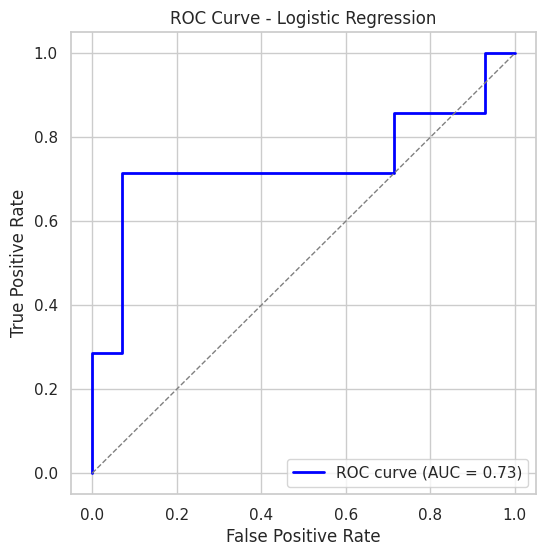

In [32]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='yes')  # 'yes' is treated as positive class
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()


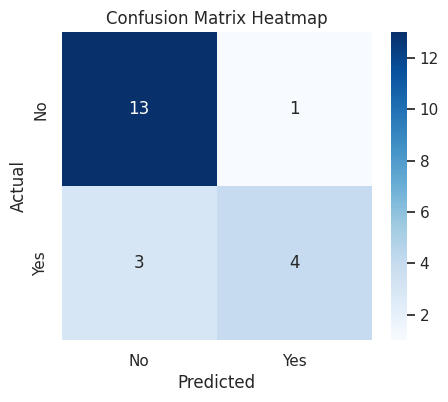

In [33]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


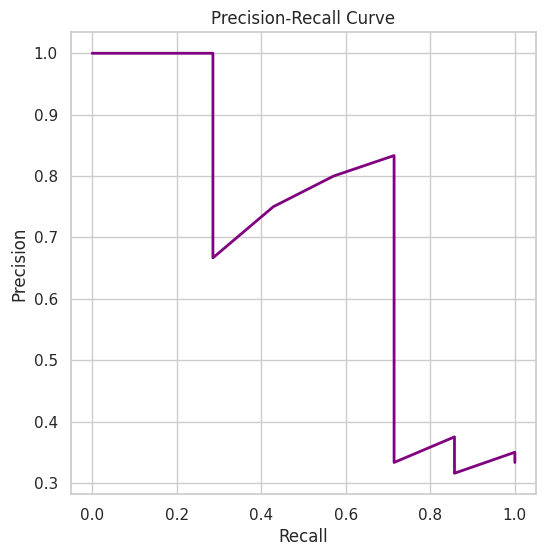

In [34]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, _ = precision_recall_curve(y_test, y_prob, pos_label='yes')

plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='purple', lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

